<a href="https://colab.research.google.com/github/AndresSepulveda/PHP_LucasC/blob/main/PHP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google. colab import drive 
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from datetime import datetime
from matplotlib.dates import MonthLocator, DateFormatter

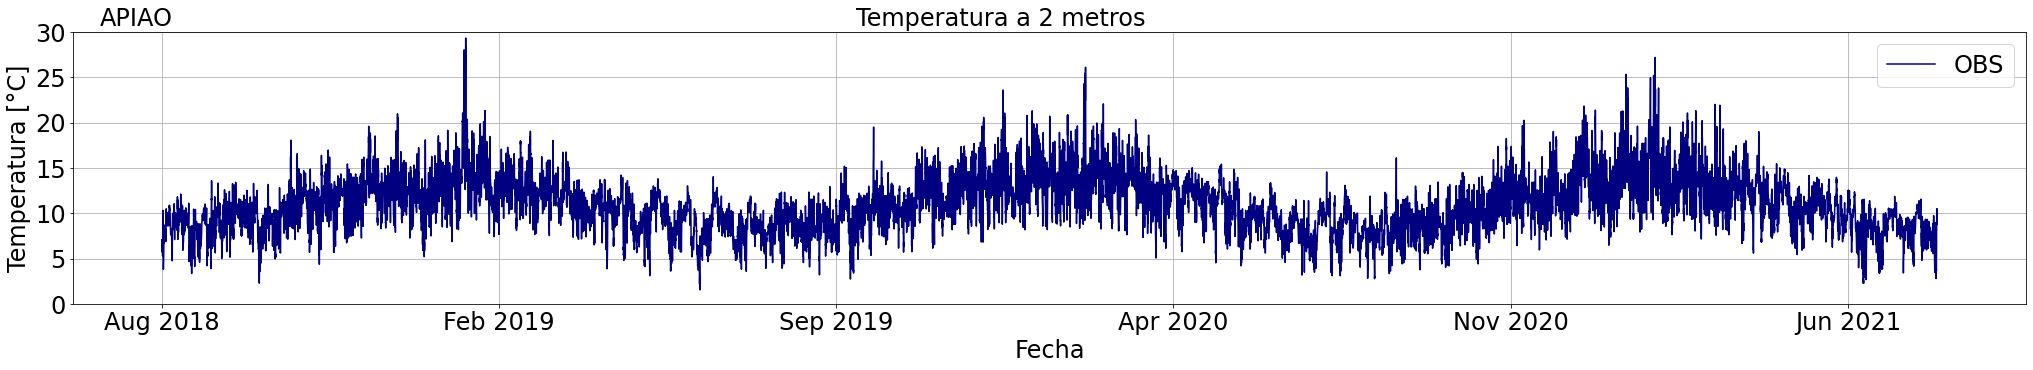

In [3]:
########### APIAO ###############
####### datos horarios ##########

# Cargamos los datos observados (desde el 1 de Agosto de 2018 00:00:00 hasta el 1 de Agosto de 2021 23:00:00)
APIAO = pd.read_excel('/content/gdrive/MyDrive/Colab/PHP/APIAO_T2.xlsx') 
APIAO.set_index('Date', inplace=True) #para dejar las fechas en el index 
# Ploteamos la serie de tiempo
ax = APIAO.plot(color='navy',grid=True,figsize=(35, 5),fontsize=24,x_compat=True)
ax.axes.title.set_size(22)
ax.set_xticklabels(['Aug 2018','Aug 2018', 'Feb 2019', 'Sep 2019', 'Apr 2020', 'Nov 2020','Jun 2021'])
plt.title("Temperatura a 2 metros", x=0.475, y=1, fontsize=24)
plt.suptitle("APIAO", x=0.15, y=0.95, fontsize=24)
plt.xlabel('Fecha', fontsize=24)
plt.ylabel('Temperatura [°C]', fontsize=24)
plt.ylim([0, 30])
plt.legend(['OBS','WRF'],fontsize=24)
#plt.savefig("APIAO_T2_OBS.png")

In [ ]:
# Ahora cargamos los datos simulados, considerando el mismo periodo de tiempo
WRF = xr.open_dataset("/content/gdrive/My Drive/Colab/PHP/apiao_24_T_2m.nc")
APIAO_WRF = WRF.to_dataframe()
di = pd.to_datetime("2018-08-01 00:00:00")
df = pd.to_datetime("2021-08-02 00:00:00")
aux=APIAO_WRF.index.get_loc(di, method='nearest')
auy=APIAO_WRF.index.get_loc(df, method='nearest')
APIAO_WRF=APIAO_WRF.iloc[aux:auy]
APIAO_WRF.index = pd.to_datetime(APIAO_WRF.index, format = '%Y/%m/%d').strftime('%d-%m-%Y')
# Ploteamos la serie de tiempo
ax2 = APIAO_WRF["T_2m"].plot(color='goldenrod',grid=True,figsize=(35, 5),fontsize=24,x_compat=True)
APIAO_WRF.plot(ax=ax)
ax2.axes.title.set_size(22)
ax2.set_xticklabels(['Aug 2018','Aug 2018', 'Mar 2019', 'Oct 2019', 'Apr 2020', 'Nov 2020','Jun 2021'])
plt.title("Temperatura a 2 metros", x=0.475, y=1, fontsize=24)
plt.suptitle("APIAO", x=0.15, y=0.95, fontsize=24)
plt.xlabel('Fecha', fontsize=24)
plt.ylabel('Temperatura [°C]', fontsize=24)
plt.ylim([0, 30])
plt.legend(['WRF'],fontsize=24)
#plt.savefig("APIAO_T2_WRF.png")

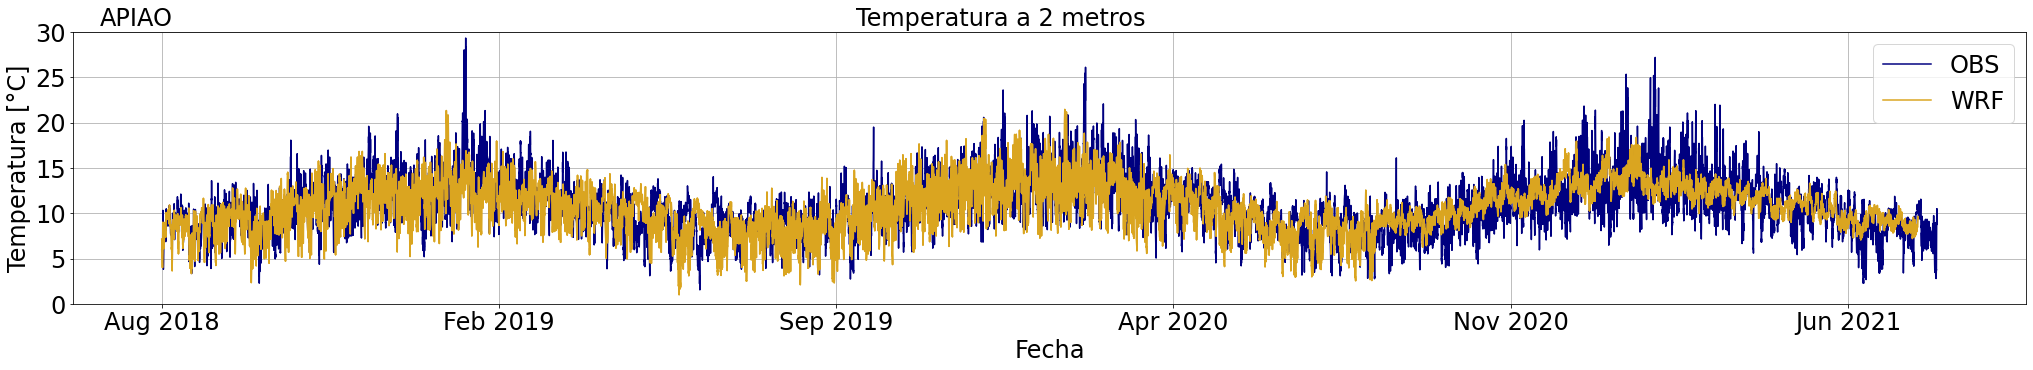

In [6]:
# Ploteamos ambas series juntas
ax = APIAO.plot(color='navy',grid=True,figsize=(35, 5),fontsize=24,x_compat=True)
APIAO_WRF["T_2m"].plot(ax=ax,color='goldenrod',grid=True)
APIAO_WRF["T_2m"].plot(ax=ax,color='goldenrod',grid=True)
ax.axes.title.set_size(22)
ax.set_xticklabels(['Aug 2018','Aug 2018', 'Feb 2019', 'Sep 2019', 'Apr 2020', 'Nov 2020','Jun 2021'])
plt.title("Temperatura a 2 metros", x=0.475, y=1, fontsize=24)
plt.suptitle("APIAO", x=0.15, y=0.95, fontsize=24)
#plt.text(25800, 30.7, r'$r=0.6$', fontsize=22)
plt.xlabel('Fecha', fontsize=24)
plt.ylabel('Temperatura [°C]', fontsize=24)
plt.ylim([0, 30])
plt.legend(['OBS','WRF'],fontsize=24)
plt.savefig("APIAO_T2.png")

In [ ]:
#distribución de probabilidad del conjunto de datos
# OBSERVADO 
#APIAO.describe()
#mean:   10.74
#std:    3.02
#prc25%: 8.682000
#prc50%: 10.485000
#prc75%: 12.533000
#APIAO.skew(axis=0)
#skewness: 0.5575

# SIMULADO
#APIAO_WRF["T_2m"].describe()
#mean:   10.53
#std:    2.7
#prc25%: 8.8
#prc50%: 10.5
#prc75%: 12.4
#APIAO_WRF["T_2m"].skew(axis=0)
#skewness: -0.00988

In [ ]:
#Histograma OBS 
ax3= APIAO.plot.hist(grid=True, bins=20, rwidth=0.9, color='navy',figsize=(8,8),fontsize=22 )
ax3.axes.title.set_size(22)
plt.title("Estación APIAO", x=0.47, y=1.11, fontsize=22)
plt.text(3, 5350, r'$mean=10.7, std= 3, skw=0.56$', fontsize=22)
plt.suptitle("Temperatura a 2 metros", x=0.5, y=0.96, fontsize=22)
plt.xlabel('Temperatura [°C]', fontsize=22)
plt.ylabel('Frecuencia (datos horarios)', fontsize=22)
plt.xlim(0, 30)
plt.ylim(0, 5300)
plt.legend(['OBS'],fontsize=22)
#plt.savefig("APIAO_Hist_OBS.png")

In [ ]:
#Histograma WRF
ax4= APIAO_WRF["T_2m"].plot.hist(grid=True, bins=20, rwidth=0.9, color='goldenrod',figsize=(8,8),fontsize=22 )
ax4.axes.title.set_size(22)
plt.title("Estación APIAO", x=0.47, y=1.11, fontsize=22)
plt.text(2, 5350, r'$mean=10.5, std= 2.7, skw=-0.01$', fontsize=22)
plt.suptitle("Temperatura a 2 metros", x=0.5, y=0.96, fontsize=22)
plt.xlabel('Temperatura [°C]', fontsize=22)
plt.ylabel('Frecuencia (datos horarios)', fontsize=22)
plt.xlim(0, 30)
plt.ylim(0, 5300)
plt.legend(['WRF'],fontsize=22)
#plt.savefig("APIAO_Hist_WRF.png")

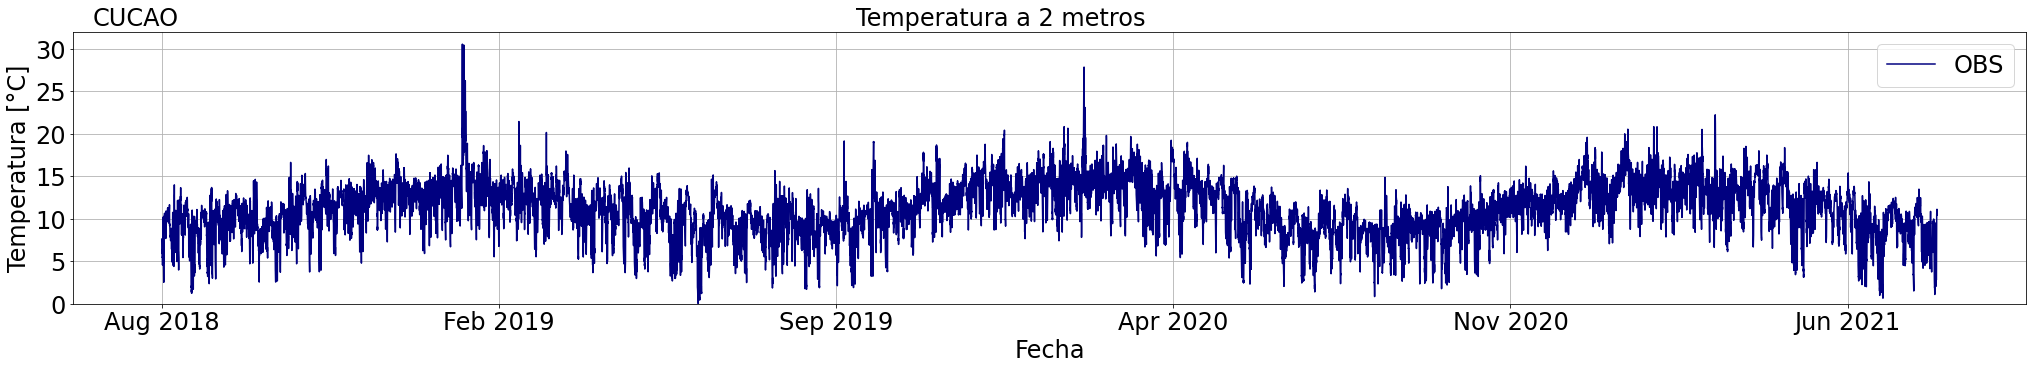

In [9]:
########### CUCAO ###############
######## datos horarios #########

# Cargamos los datos observados (desde el 1 de Agosto de 2018 00:00:00 hasta el 1 de Agosto de 2021 23:00:00)
CUCAO = pd.read_excel('/content/gdrive/MyDrive/Colab/PHP/CUCAO_T2.xlsx') 
CUCAO.set_index('Date', inplace=True) #para dejar las fechas en el index 
# Ploteamos la serie de tiempo
ax = CUCAO.plot(color='navy',grid=True,figsize=(35, 5),fontsize=24,x_compat=True)
ax.axes.title.set_size(22)
ax.set_xticklabels(['Aug 2018','Aug 2018', 'Feb 2019', 'Sep 2019', 'Apr 2020', 'Nov 2020','Jun 2021'])
plt.title("Temperatura a 2 metros", x=0.475, y=1, fontsize=24)
plt.suptitle("CUCAO", x=0.15, y=0.95, fontsize=24)
plt.xlabel('Fecha', fontsize=24)
plt.ylabel('Temperatura [°C]', fontsize=24)
plt.ylim([0, 32])
plt.legend(['OBS','WRF'],fontsize=24)
#plt.savefig("CUCAO_T2_OBS.png")

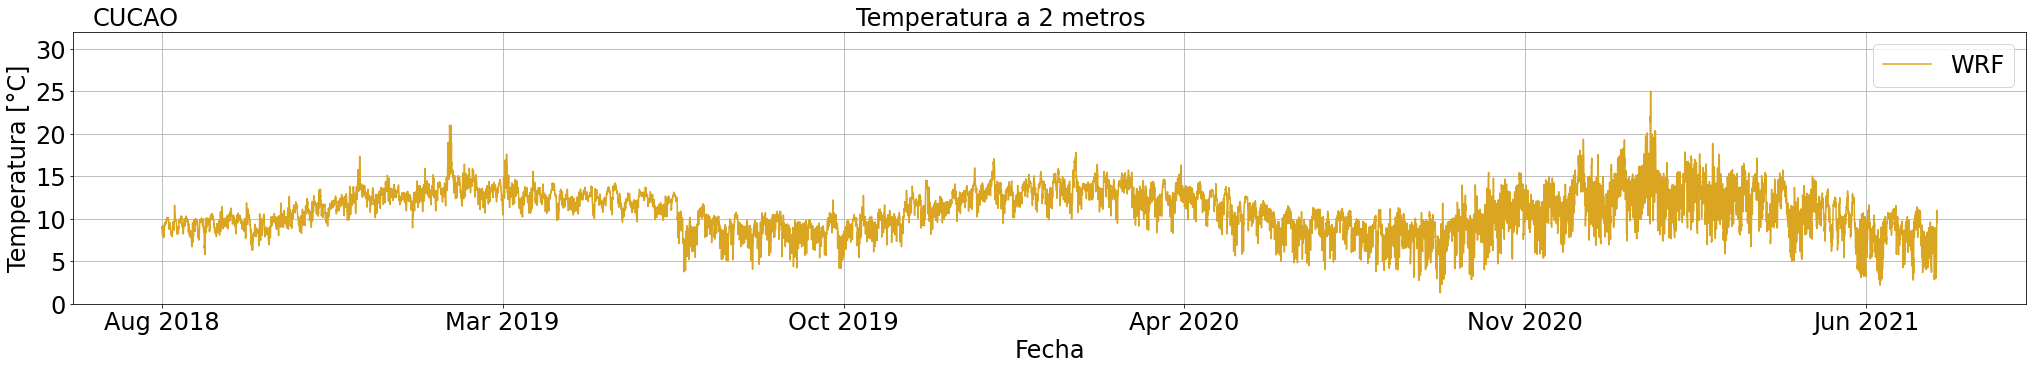

In [10]:
# Ahora cargamos los datos simulados, considerando el mismo periodo de tiempo
WRF = xr.open_dataset("/content/gdrive/My Drive/Colab/PHP/cucao_24_T_2m.nc")
CUCAO_WRF = WRF.to_dataframe()
di = pd.to_datetime("2018-08-01 00:00:00")
df = pd.to_datetime("2021-08-02 00:00:00")
aux=CUCAO_WRF.index.get_loc(di, method='nearest')
auy=CUCAO_WRF.index.get_loc(df, method='nearest')
CUCAO_WRF=CUCAO_WRF.iloc[aux:auy]
CUCAO_WRF.index = pd.to_datetime(CUCAO_WRF.index, format = '%Y/%m/%d').strftime('%d-%m-%Y')
# Ploteamos la serie de tiempo
ax2 = CUCAO_WRF["T_2m"].plot(color='goldenrod',grid=True,figsize=(35, 5),fontsize=24,x_compat=True)
CUCAO_WRF.plot(ax=ax)
ax2.axes.title.set_size(22)
ax2.set_xticklabels(['Aug 2018','Aug 2018', 'Mar 2019', 'Oct 2019', 'Apr 2020', 'Nov 2020','Jun 2021'])
plt.title("Temperatura a 2 metros", x=0.475, y=1, fontsize=24)
plt.suptitle("CUCAO", x=0.15, y=0.95, fontsize=24)
plt.xlabel('Fecha', fontsize=24)
plt.ylabel('Temperatura [°C]', fontsize=24)
plt.ylim([0, 32])
plt.legend(['WRF'],fontsize=24)
#plt.savefig("CUCAO_T2_WRF.png")

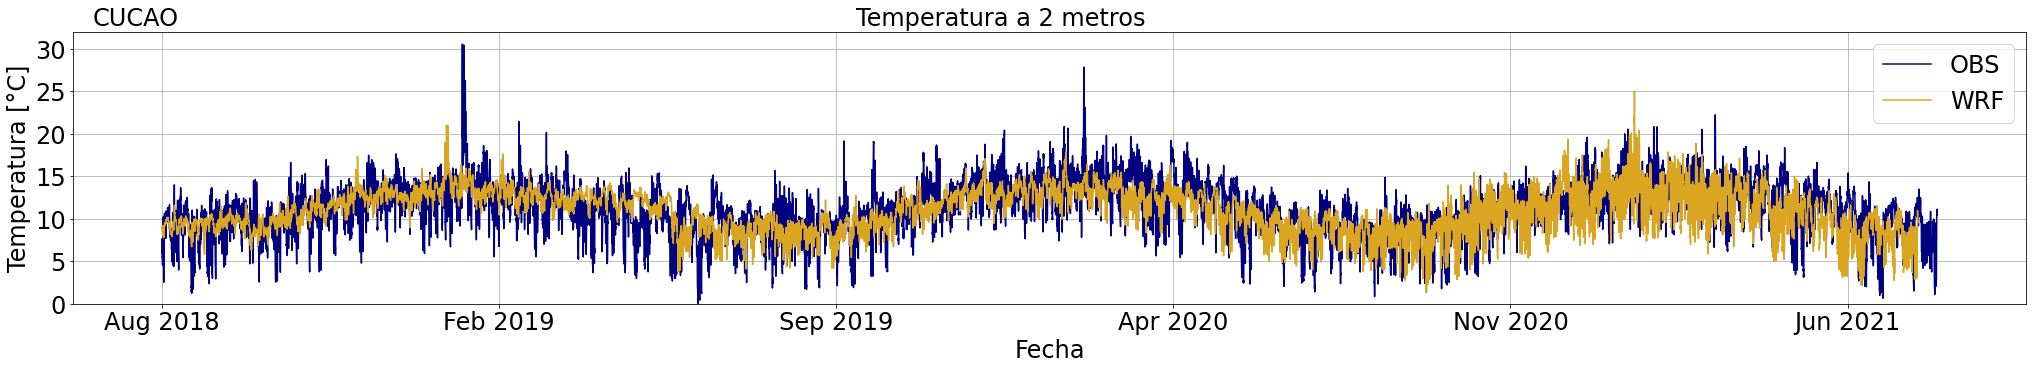

In [11]:
# Ploteamos ambas series juntas
ax = CUCAO.plot(color='navy',grid=True,figsize=(35, 5),fontsize=24,x_compat=True)
CUCAO_WRF["T_2m"].plot(ax=ax,color='goldenrod',grid=True)
ax.axes.title.set_size(22)
ax.set_xticklabels(['Aug 2018','Aug 2018', 'Feb 2019', 'Sep 2019', 'Apr 2020', 'Nov 2020','Jun 2021'])
plt.title("Temperatura a 2 metros", x=0.475, y=1, fontsize=24)
plt.suptitle("CUCAO", x=0.15, y=0.95, fontsize=24)
#plt.text(25800, 32.7, r'$r=0.6$', fontsize=22)
plt.xlabel('Fecha', fontsize=24)
plt.ylabel('Temperatura [°C]', fontsize=24)
plt.ylim([0, 32])
plt.legend(['OBS','WRF'],fontsize=24)
plt.savefig("CUCAO_T2.png")

In [ ]:
#distribución de probabilidad del conjunto de datos
# OBSERVADO 
#CUCAO.describe()
#mean:   11.1
#std:    3.2
#prc25%: 9.1
#prc50%: 11.2
#prc75%: 13.3
#CUCAO.skew(axis=0)
#skewness: -0.186

# SIMULADO
#CUCAO_WRF["T_2m"].describe()
#mean:   11
#std:    2.5
#prc25%: 9.3
#prc50%: 11.1
#prc75%: 12.9
#CUCAO_WRF["T_2m"].skew(axis=0)
#skewness: -0.173

In [ ]:
#Histograma OBS 
ax3= CUCAO.plot.hist(grid=True, bins=20, rwidth=0.9, color='navy',figsize=(8,8),fontsize=22 )
ax3.axes.title.set_size(22)
plt.title("Estación CUCAO", x=0.47, y=1.11, fontsize=22)
plt.text(2, 5350, r'$mean=11.1, std= 3.2, skw=-0.19$', fontsize=22)
plt.suptitle("Temperatura a 2 metros", x=0.5, y=0.96, fontsize=22)
plt.xlabel('Temperatura [°C]', fontsize=22)
plt.ylabel('Frecuencia (datos horarios)', fontsize=22)
plt.xlim(0, 30)
plt.ylim(0, 5300)
plt.legend(['OBS'],fontsize=22)
plt.savefig("CUCAO_Hist_OBS.png")

In [ ]:
#Histograma WRF
ax4= CUCAO_WRF["T_2m"].plot.hist(grid=True, bins=20, rwidth=0.9, color='goldenrod',figsize=(8,8),fontsize=22 )
ax4.axes.title.set_size(22)
plt.title("Estación CUCAO", x=0.47, y=1.11, fontsize=22)
plt.text(2, 5350, r'$mean=11, std= 2.5, skw=-0.17$', fontsize=22)
plt.suptitle("Temperatura a 2 metros", x=0.5, y=0.96, fontsize=22)
plt.xlabel('Temperatura [°C]', fontsize=22)
plt.ylabel('Frecuencia (datos horarios)', fontsize=22)
plt.xlim(0, 30)
plt.ylim(0, 5300)
plt.legend(['WRF'],fontsize=22)
plt.savefig("CUCAO_Hist_WRF.png")

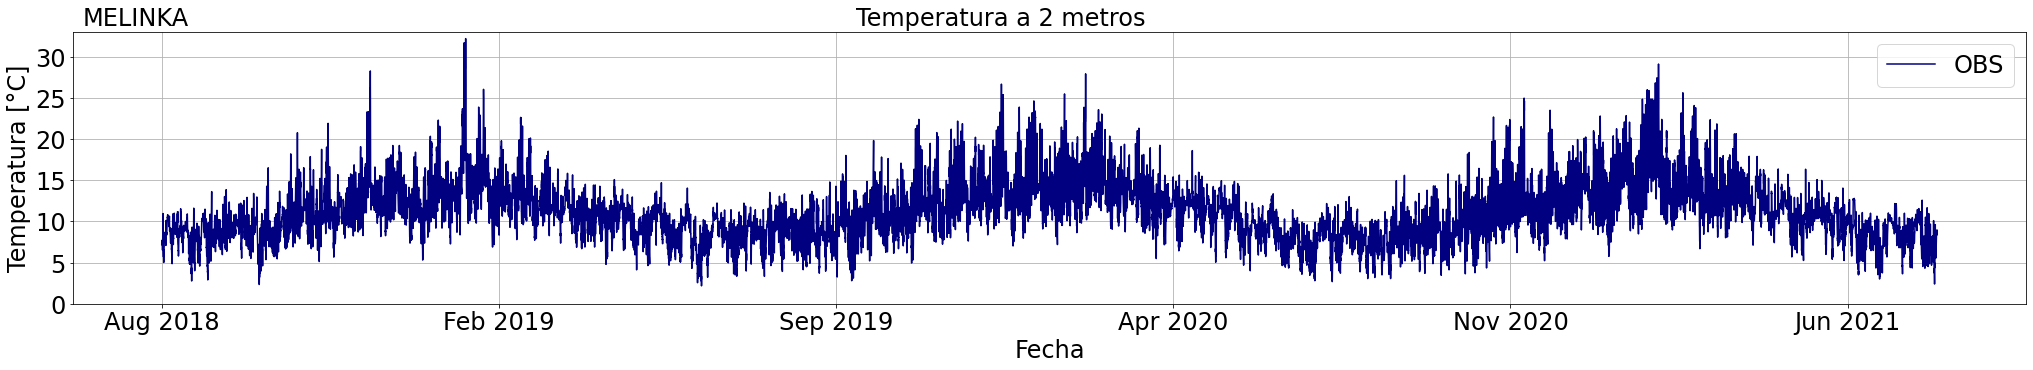

In [12]:
########### MELINKA #############
####### datos horarios ##########

# Cargamos los datos observados (desde el 1 de Agosto de 2018 00:00:00 hasta el 1 de Agosto de 2021 23:00:00)
MELINKA= pd.read_excel('/content/gdrive/MyDrive/Colab/PHP/MELINKA_T2.xlsx') 
MELINKA.set_index('Date', inplace=True) #para dejar las fechas en el index 
# Ploteamos la serie de tiempo
ax = MELINKA.plot(color='navy',grid=True,figsize=(35, 5),fontsize=24,x_compat=True)
ax.axes.title.set_size(22)
ax.set_xticklabels(['Aug 2018','Aug 2018', 'Feb 2019', 'Sep 2019', 'Apr 2020', 'Nov 2020','Jun 2021'])
plt.title("Temperatura a 2 metros", x=0.475, y=1, fontsize=24)
plt.suptitle("MELINKA", x=0.15, y=0.95, fontsize=24)
plt.xlabel('Fecha', fontsize=24)
plt.ylabel('Temperatura [°C]', fontsize=24)
plt.ylim([0, 33])
plt.legend(['OBS','WRF'],fontsize=24)
#plt.savefig("MELINKA_T2_OBS.png")

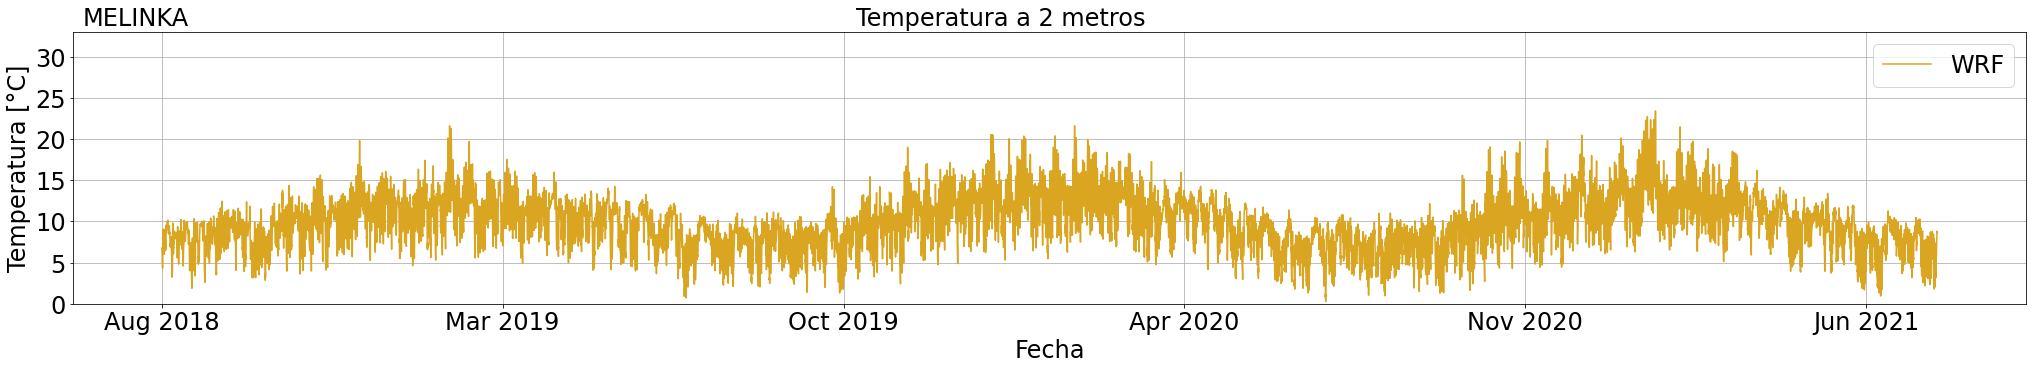

In [13]:
# Ahora cargamos los datos simulados, considerando el mismo periodo de tiempo
WRF = xr.open_dataset("/content/gdrive/My Drive/Colab/PHP/melinka_24_T_2m.nc")
MELINKA_WRF = WRF.to_dataframe()
di = pd.to_datetime("2018-08-01 00:00:00")
df = pd.to_datetime("2021-08-02 00:00:00")
aux=MELINKA_WRF.index.get_loc(di, method='nearest')
auy=MELINKA_WRF.index.get_loc(df, method='nearest')
MELINKA_WRF=MELINKA_WRF.iloc[aux:auy]
MELINKA_WRF.index = pd.to_datetime(MELINKA_WRF.index, format = '%Y/%m/%d').strftime('%d-%m-%Y')
# Ploteamos la serie de tiempo
ax2 = MELINKA_WRF["T_2m"].plot(color='goldenrod',grid=True,figsize=(35, 5),fontsize=24,x_compat=True)
MELINKA_WRF.plot(ax=ax)
ax2.axes.title.set_size(22)
ax2.set_xticklabels(['Aug 2018','Aug 2018', 'Mar 2019', 'Oct 2019', 'Apr 2020', 'Nov 2020','Jun 2021'])
plt.title("Temperatura a 2 metros", x=0.475, y=1, fontsize=24)
plt.suptitle("MELINKA", x=0.15, y=0.95, fontsize=24)
plt.xlabel('Fecha', fontsize=24)
plt.ylabel('Temperatura [°C]', fontsize=24)
plt.ylim([0, 33])
plt.legend(['WRF'],fontsize=24)
#plt.savefig("MELINKA_T2_WRF.png")

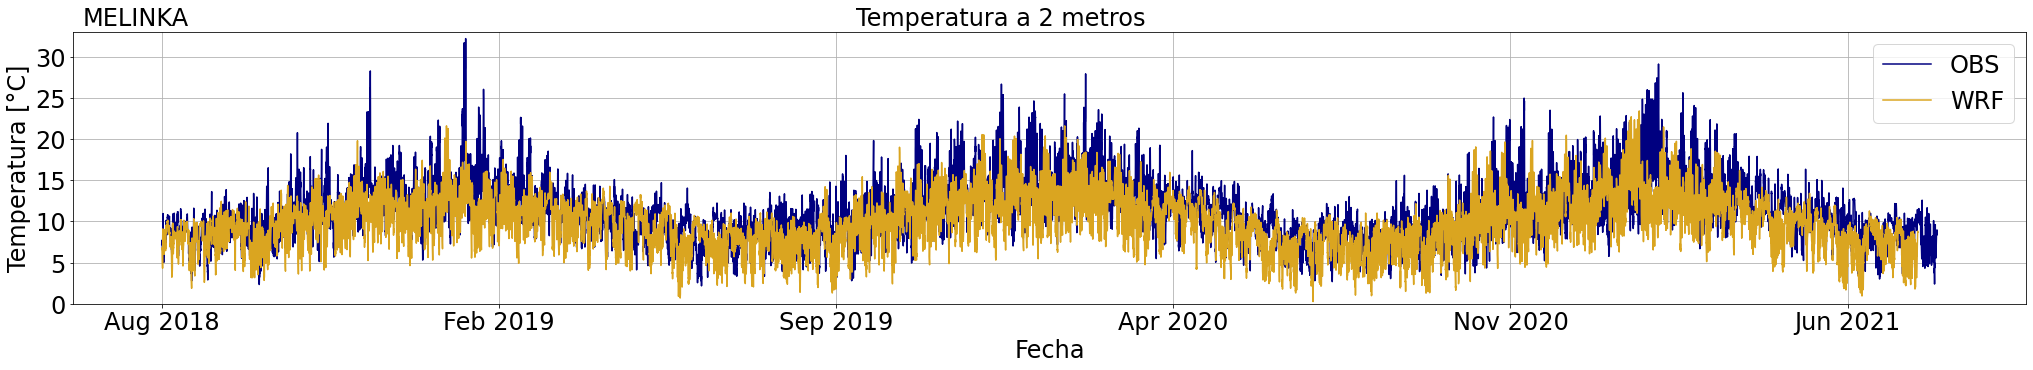

In [14]:
# Ploteamos ambas series juntas
ax = MELINKA.plot(color='navy',grid=True,figsize=(35, 5),fontsize=24,x_compat=True)
MELINKA_WRF["T_2m"].plot(ax=ax,color='goldenrod',grid=True)
ax.axes.title.set_size(22)
ax.set_xticklabels(['Aug 2018','Aug 2018', 'Feb 2019', 'Sep 2019', 'Apr 2020', 'Nov 2020','Jun 2021'])
plt.title("Temperatura a 2 metros", x=0.475, y=1, fontsize=24)
plt.suptitle("MELINKA", x=0.15, y=0.95, fontsize=24)
#plt.text(25800, 33.7, r'$r=0.6$', fontsize=22)
plt.xlabel('Fecha', fontsize=24)
plt.ylabel('Temperatura [°C]', fontsize=24)
plt.ylim([0, 33])
plt.legend(['OBS','WRF'],fontsize=24)
plt.savefig("MELINKA_T2.png")

In [ ]:
#distribución de probabilidad del conjunto de datos
# OBSERVADO 
#MELINKA.describe()
#mean:   11.9
#std:    3.5
#prc25%: 8.6
#prc50%: 10.5
#prc75%: 12.8
#MELINKA.skew(axis=0)
#skewness: 0.83

# SIMULADO
#MELINKA_WRF["T_2m"].describe()
#mean:   9.6
#std:    3.3
#prc25%: 7.4
#prc50%: 9.5
#prc75%: 11.8
#MELINKA_WRF["T_2m"].skew(axis=0)
#skewness: 0.28

In [ ]:
#Histograma OBS 
ax3= MELINKA.plot.hist(grid=True, bins=20, rwidth=0.9, color='navy',figsize=(8,8),fontsize=22 )
ax3.axes.title.set_size(22)
plt.title("Estación MELINKA", x=0.47, y=1.11, fontsize=22)
plt.text(2.7, 5350, r'$mean=11.9, std= 3.5, skw=0.83$', fontsize=22)
plt.suptitle("Temperatura a 2 metros", x=0.5, y=0.96, fontsize=22)
plt.xlabel('Temperatura [°C]', fontsize=22)
plt.ylabel('Frecuencia (datos horarios)', fontsize=22)
plt.xlim(0, 30)
plt.ylim(0, 5300)
plt.legend(['OBS'],fontsize=22)
plt.savefig("MELINKA_Hist_OBS.png")

In [ ]:
#Histograma WRF
ax4= MELINKA_WRF["T_2m"].plot.hist(grid=True, bins=20, rwidth=0.9, color='goldenrod',figsize=(8,8),fontsize=22 )
ax4.axes.title.set_size(22)
plt.title("Estación MELINKA", x=0.47, y=1.11, fontsize=22)
plt.text(2.7, 5350, r'$mean=9.6, std= 3.3, skw=0.28$', fontsize=22)
plt.suptitle("Temperatura a 2 metros", x=0.5, y=0.96, fontsize=22)
plt.xlabel('Temperatura [°C]', fontsize=22)
plt.ylabel('Frecuencia (datos horarios)', fontsize=22)
plt.xlim(0, 30)
plt.ylim(0, 5300)
plt.legend(['WRF'],fontsize=22)
plt.savefig("MELINKA_Hist_WRF.png")